In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

<AxesSubplot:title={'center':'Зависимость жёсткости воды и средней годовой смертностью'}, xlabel='mortality', ylabel='hardness'>

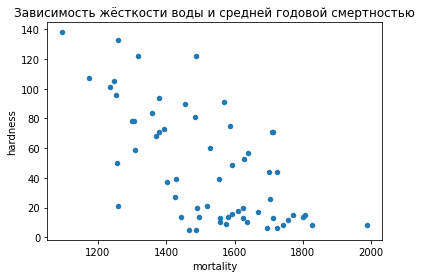

In [10]:
# Задание 1
water_df = pd.read_csv('water.csv')

# Построим точечный график
water_df.plot(
    kind='scatter',
    x='mortality',
    y='hardness',
    title='Зависимость жёсткости воды и средней годовой смертностью',
    )

In [ ]:
# Наблюдается обратная зависимость

In [12]:
# Расчитаем коэффициент корреляции Пирсона и Спирмана
pirson_df = water_df[['mortality', 'hardness']].corr()
spearman_df = water_df[['mortality', 'hardness']].corr(method='spearman')

print('коэффициенты корреляции Пирсона:', pirson_df['hardness']['mortality'])
print('коэффициенты корреляции Спирмана:', spearman_df['hardness']['mortality'])


коэффициенты корреляции Пирсона: -0.6548486232042464
коэффициенты корреляции Спирмана: -0.6316646189166502


In [ ]:
# Сила связи - средняя

[-0.12670202]
239.3678426140957


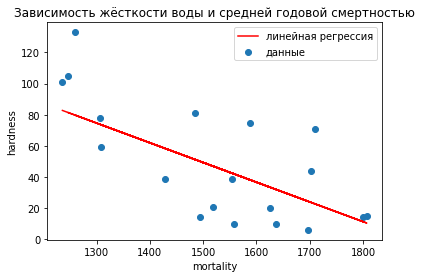

In [19]:
# Построим линейную регрессию

x = water_df[['mortality']]
y = water_df['hardness']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

model = LinearRegression()
result = model.fit(x_train, y_train)

print(model.coef_)
print(model.intercept_)

y_pred = model.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('Зависимость жёсткости воды и средней годовой смертностью')
plt.legend(['линейная регрессия', 'данные'], loc='best')
plt.show()

In [20]:
print('Коэффициент детерминации:', model.score(x_test, y_test))

Коэффициент детерминации: 0.4948982822876836


In [ ]:
#  Коэффициент детерминации ~ 0.5 - умереный

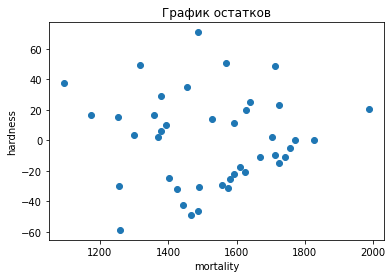

In [34]:
# Построим график остатков
X_const = sm.add_constant(x_train)

model = sm.OLS(y_train, X_const)
results = model.fit()
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('График остатков')
plt.show()


In [ ]:
# остатки расположены достаточно хаотично, что говорит, что модель подобрана правильно

In [35]:
# Задание 2
water_s_df = water_df[water_df.location == 'South']
water_n_df = water_df[water_df.location == 'North']

Text(0, 0.5, 'hardness')

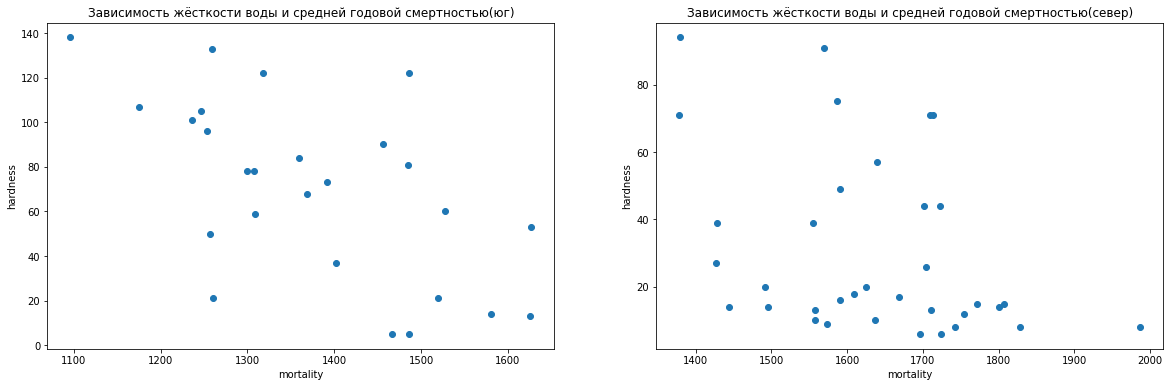

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,6
# Построим точечный график для юга
plt.subplot(1, 2, 1)
plt.scatter(water_s_df['mortality'], water_s_df['hardness'])
plt.title('Зависимость жёсткости воды и средней годовой смертностью(юг)')
plt.xlabel('mortality')
plt.ylabel('hardness')
# Построим точечный график для севера
plt.subplot(1, 2, 2)
plt.scatter(water_n_df['mortality'], water_n_df['hardness'])
plt.title('Зависимость жёсткости воды и средней годовой смертностью(север)')
plt.xlabel('mortality')
plt.ylabel('hardness')

In [56]:
# Расчитаем коэффициент корреляции Пирсона и Спирмана
pirson_s_df = water_s_df[['mortality', 'hardness']].corr()
spearman_s_df = water_s_df[['mortality', 'hardness']].corr(method='spearman')

pirson_n_df = water_n_df[['mortality', 'hardness']].corr()
spearman_n_df = water_n_df[['mortality', 'hardness']].corr(method='spearman')

print('коэффициенты корреляции Пирсона(юг):', pirson_s_df['hardness']['mortality'])
print('коэффициенты корреляции Спирмана(юг):', spearman_s_df['hardness']['mortality'])
print('\nкоэффициенты корреляции Пирсона(север):', pirson_n_df['hardness']['mortality'])
print('коэффициенты корреляции Спирмана(север):', spearman_n_df['hardness']['mortality'])

коэффициенты корреляции Пирсона(юг): -0.6021532715484159
коэффициенты корреляции Спирмана(юг): -0.5957229185013566

коэффициенты корреляции Пирсона(север): -0.36859783832887183
коэффициенты корреляции Спирмана(север): -0.4042078956511175


In [ ]:
# У южных городов сила взаимосвязи выше чем у северных (юг - средняя, север - слабая)

[-0.18112812] 324.1190746235986
[-0.09774218] 191.7279767911201


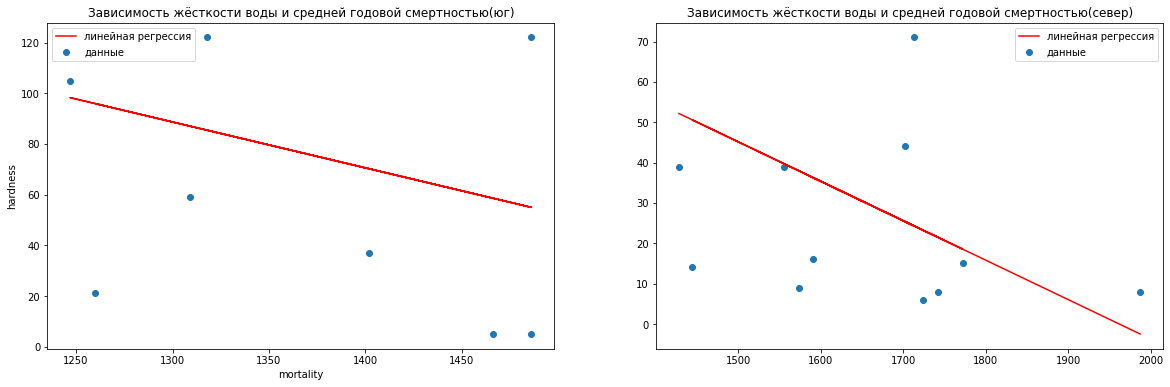

In [61]:
# Построим линейную регрессию

x_s = water_s_df[['mortality']]
y_s = water_s_df['hardness']

x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(x_s, y_s, test_size=0.30, random_state=42)

model_s = LinearRegression()
result_s = model_s.fit(x_s_train, y_s_train)

print(model_s.coef_, model_s.intercept_)

y_s_pred = model_s.predict(x_s_test)


x_n = water_n_df[['mortality']]
y_n = water_n_df['hardness']

x_n_train, x_n_test, y_n_train, y_n_test = train_test_split(x_n, y_n, test_size=0.30, random_state=42)

model_n = LinearRegression()
result_n = model_n.fit(x_n_train, y_n_train)

print(model_n.coef_, model_n.intercept_)

y_n_pred = model_n.predict(x_n_test)

plt.subplot(1, 2, 1)
plt.scatter(x_s_test, y_s_test)
plt.plot(x_s_test, y_s_pred, c='r')
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('Зависимость жёсткости воды и средней годовой смертностью(юг)')
plt.legend(['линейная регрессия', 'данные'], loc='best')

plt.subplot(1, 2, 2)
plt.scatter(x_n_test, y_n_test)
plt.plot(x_n_test, y_n_pred, c='r')
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('Зависимость жёсткости воды и средней годовой смертностью(север)')
plt.legend(['линейная регрессия', 'данные'], loc='best')
plt.show()

In [62]:
print('Коэффициент детерминации(юг):', model_s.score(x_s_test, y_s_test))
print('Коэффициент детерминации(север):', model_n.score(x_n_test, y_n_test))

Коэффициент детерминации(юг): -0.05226615794483802
Коэффициент детерминации(север): -0.34863672627416764


In [ ]:
# Коэффициенты детерминации получились отрицательные, это значит, что простое среднее приближает лучше

Text(0.5, 1.0, 'График остатков(юг)')

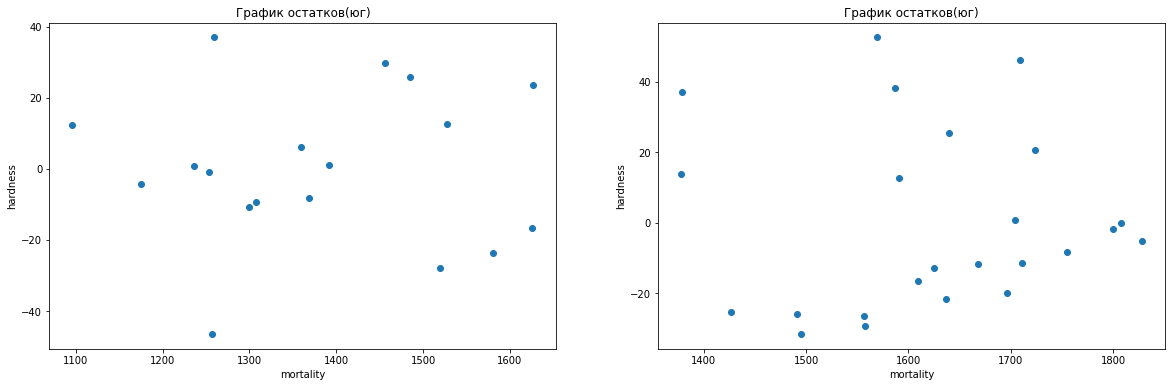

In [68]:
# Построим график остатков(юг)
X_s_const = sm.add_constant(x_s_train)

model_s = sm.OLS(y_s_train, X_s_const)
results_s = model_s.fit()

plt.subplot(1, 2, 1)
plt.scatter(X_s_const.iloc[:, 1], results_s.resid)
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('График остатков(юг)')

# Построим график остатков(север)
X_n_const = sm.add_constant(x_n_train)

model_n = sm.OLS(y_n_train, X_n_const)
results_n = model_n.fit()

plt.subplot(1, 2, 2)
plt.scatter(X_n_const.iloc[:, 1], results_n.resid)
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('График остатков(юг)')